In [672]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date
import csv
import datetime
from pathlib import Path
today = date.today()


In [673]:
# File to Load
vaccine_csv_path = Path("US.csv")

#Read csv data
US_df = pd.read_csv("US.csv")
US_df


,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,US,2020-01-01,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.65,0.36,0.17,-0.975309,-5.913580,6.314815,0.0,64.77,-5.790123,70.015448
1,US,2020-01-02,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.60,0.39,0.16,2.660494,-1.648148,6.709877,0.0,40.64,-0.759259,78.356538
2,US,2020-01-03,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.46,0.38,0.16,1.055556,-2.648148,5.703704,0.0,30.48,-2.475309,77.390895
3,US,2020-01-04,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.71,0.38,0.17,0.006173,-6.617284,9.197531,0.0,30.48,-5.407407,67.237910
4,US,2020-01-05,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.81,0.38,0.17,5.203704,0.543210,8.580247,0.0,NaN,-2.790123,56.438457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,US,2022-09-13,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,21.983333,12.761111,33.616667,0.0,NaN,10.966667,49.999442
987,US,2022-09-14,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,23.518519,21.407407,27.049383,0.0,NaN,12.790123,51.394811
988,US,2022-09-15,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,US,2022-09-16,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [674]:
# new data frame for time series analysis: date vs new vaccine doses administered per vaccine 
vaccination_timeseries_df = US_df[['date', 'new_vaccine_doses_administered', 'new_vaccine_doses_administered_pfizer', 'new_vaccine_doses_administered_moderna', 'new_vaccine_doses_administered_janssen']]
vaccination_timeseries_df = vaccination_timeseries_df.dropna()

#convert date to string
vaccination_timeseries_df['DateTypeCol'] = pd.to_datetime(vaccination_timeseries_df['date'])
vaccination_timeseries_df['ConvertedDate'] = vaccination_timeseries_df['DateTypeCol'].dt.strftime('%b %y')

vaccination_timeseries_df

,date,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen,DateTypeCol,ConvertedDate
433,2021-03-09,2721218.0,803936.0,699045.0,99591.0,2021-03-09,Mar 21
434,2021-03-10,3150257.0,976933.0,899906.0,150730.0,2021-03-10,Mar 21
435,2021-03-11,3462502.0,1103761.0,1198010.0,179558.0,2021-03-11,Mar 21
436,2021-03-12,3437143.0,1251480.0,1435922.0,235257.0,2021-03-12,Mar 21
437,2021-03-13,2193720.0,0.0,0.0,0.0,2021-03-13,Mar 21
...,...,...,...,...,...,...,...
984,2022-09-11,0.0,0.0,0.0,0.0,2022-09-11,Sep 22
985,2022-09-12,0.0,0.0,0.0,0.0,2022-09-12,Sep 22
986,2022-09-13,0.0,0.0,0.0,0.0,2022-09-13,Sep 22
987,2022-09-14,0.0,0.0,0.0,0.0,2022-09-14,Sep 22


In [675]:
#drop other date columns
vaccination_timeseries = vaccination_timeseries_df[['ConvertedDate', 
                                                    'new_vaccine_doses_administered', 
                                                    'new_vaccine_doses_administered_pfizer', 
                                                    'new_vaccine_doses_administered_moderna', 
                                                    'new_vaccine_doses_administered_janssen']]
vaccination_timeseries



,ConvertedDate,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
433,Mar 21,2721218.0,803936.0,699045.0,99591.0
434,Mar 21,3150257.0,976933.0,899906.0,150730.0
435,Mar 21,3462502.0,1103761.0,1198010.0,179558.0
436,Mar 21,3437143.0,1251480.0,1435922.0,235257.0
437,Mar 21,2193720.0,0.0,0.0,0.0
...,...,...,...,...,...
984,Sep 22,0.0,0.0,0.0,0.0
985,Sep 22,0.0,0.0,0.0,0.0
986,Sep 22,0.0,0.0,0.0,0.0
987,Sep 22,0.0,0.0,0.0,0.0


In [677]:

# GroupBy multiple columns using pivot function
vaccination_timeseries2 = vaccination_timeseries.groupby(['ConvertedDate'],as_index = False).sum()
vaccination_timeseries2


,ConvertedDate,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
0,Apr 21,90513434.0,50241487.0,34682937.0,4924026.0
1,Apr 22,13529075.0,8529273.0,6265950.0,121611.0
2,Aug 21,24291403.0,17013462.0,6563772.0,949718.0
3,Aug 22,4093423.0,2546509.0,1338486.0,-11790.0
4,Dec 21,46333763.0,28218519.0,17624654.0,982595.0
5,Feb 22,11137585.0,9773787.0,4179209.0,268714.0
6,Jan 22,28559060.0,20183122.0,10492419.0,556545.0
7,Jul 21,16485223.0,12696053.0,5368851.0,1003177.0
8,Jul 22,7651369.0,4694089.0,2698815.0,44651.0
9,Jun 21,25445235.0,20932966.0,8993954.0,1629129.0


In [667]:
# new data frame for time series analysis: date vs new vaccine doses administered per vaccine 
vaccination_timeseries_df = US_df[['date', 'new_vaccine_doses_administered', 'new_vaccine_doses_administered_pfizer', 'new_vaccine_doses_administered_moderna', 'new_vaccine_doses_administered_janssen']]

#drop NaN values
vaccination_timeseries_df = vaccination_timeseries_df.dropna()

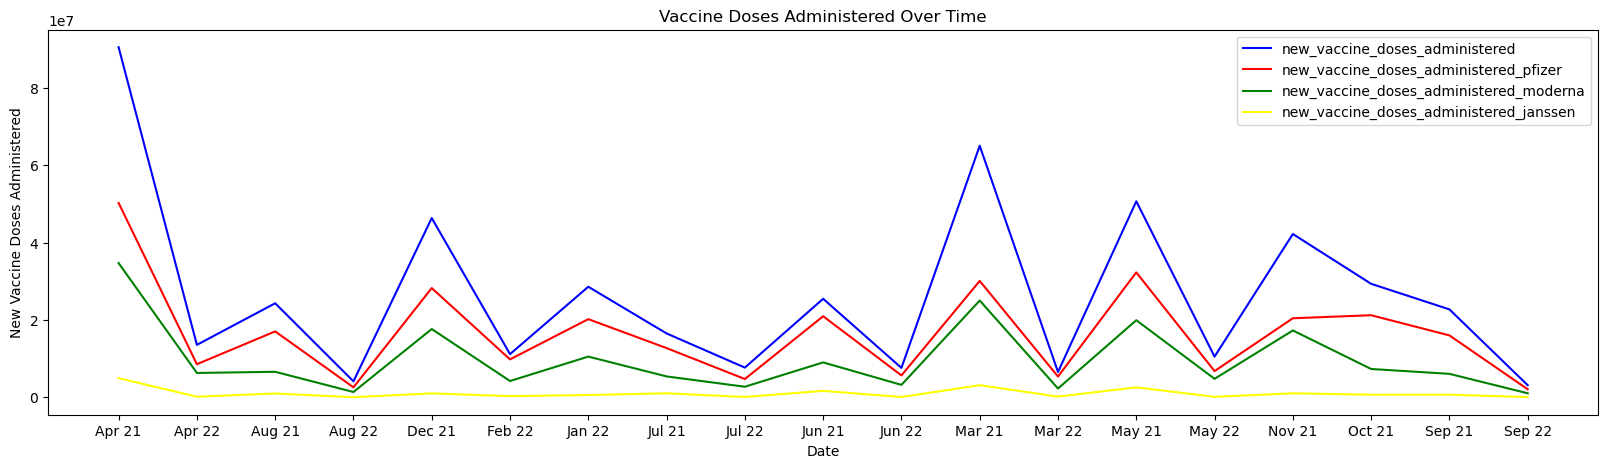

In [668]:

line_graph = plt.plot(vaccination_timeseries2['Date'], vaccination_timeseries2['new_vaccine_doses_administered'], color="blue")
line_graph = plt.plot(vaccination_timeseries2['Date'], vaccination_timeseries2['new_vaccine_doses_administered_pfizer'], color="red")
line_graph = plt.plot(vaccination_timeseries2['Date'], vaccination_timeseries2['new_vaccine_doses_administered_moderna'], color="green")
line_graph = plt.plot(vaccination_timeseries2['Date'], vaccination_timeseries2['new_vaccine_doses_administered_janssen'], color="yellow")
plt.xlabel('Date')
plt.ylabel('New Vaccine Doses Administered')
plt.title('Vaccine Doses Administered Over Time')
plt.legend(["new_vaccine_doses_administered", "new_vaccine_doses_administered_pfizer", "new_vaccine_doses_administered_moderna", "New Janssen Administered"])


plt.show()

In [ ]:
#fix x axis to display data in chronological order (x-axis)

#rename axis titles

#add markers?
#hover to show value feature?